<a href="https://colab.research.google.com/github/ineslca/workbooks/blob/main/W4%2C_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quantitative Methods 2:  Data Science and Visualisation
## Workshop 4: Plotting revisited
We've created some basic plots over the last couple of weeks, but it would be nice to control the quality, appearance, and information presented in our plots. We can do that by using optional arguments and styles, but also by using new libraries that open up new visualisation techniques and ways of sharing our outputs

### Aims:

- Experiment with new forms and tools
- Understand how to change the appearance of standard plots
- Work with different libraries
- Create web-enabled graphs
- Improve the quality of our plots

## Downloading the Data
Let's grab the data we will need this week from our course website and save it into our data folder. If you've not already created a data folder then do so using the following command. 

Don't worry if it generates an error, that means you've already got a data folder.

In [ ]:
!mkdir data

In [ ]:
!mkdir data/wk4
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk4/UN_Life_2012.csv -o ./data/wk4/UN_Life_2012.csv
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk4/UN_Life_all.csv -o ./data/wk4/UN_Life_all.csv
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk4/UN_Cities_all.csv -o ./data/wk4/UN_Cities_all.csv
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk4/tips.csv -o ./data/wk4/tips.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10127  100 10127    0     0  24520      0 --:--:-- --:--:-- --:--:-- 24580
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  354k  100  354k    0     0   460k      0 --:--:-- --:--:-- --:--:--  460k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6322k  100 6322k    0     0  5070k      0  0:00:01  0:00:01 --:--:-- 5070k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9729  100  9729    0     0  22731      0 --:--:-- --:--:-- --:--:-- 22678


`------------------`     

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)

## Life on Bars

We're going to work with some data we looked at last week, on life expectancy, compiled by the UN. Here is the source:

http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3ASP.DYN.LE00.IN

I've filtered and cleaned it, and focussed on just 2012 data:

In [ ]:
data_path = "./data/wk4/UN_Life_2012.csv"
data = pd.read_csv(data_path)
data.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2012,60.509122,NaN
1,Albania,2012,77.350463,NaN
2,Algeria,2012,70.882171,NaN
3,Angola,2012,51.464000,NaN
4,Antigua and Barbuda,2012,75.665317,NaN


## Exercise

Clean this data by removing the Year and Value Footnotes columns, and plot it on a labelled histogram. Then save this as an image file using "plt.savefig(*filename*)".

In [ ]:
data.drop("Year", axis=1, inplace=True)
data.drop("Value Footnotes", axis=1, inplace=True)

In [ ]:
data.head()

,Country or Area,Value
0,Afghanistan,60.509122
1,Albania,77.350463
2,Algeria,70.882171
3,Angola,51.464000
4,Antigua and Barbuda,75.665317


Text(0.5, 0, 'Life Expectancy Value')

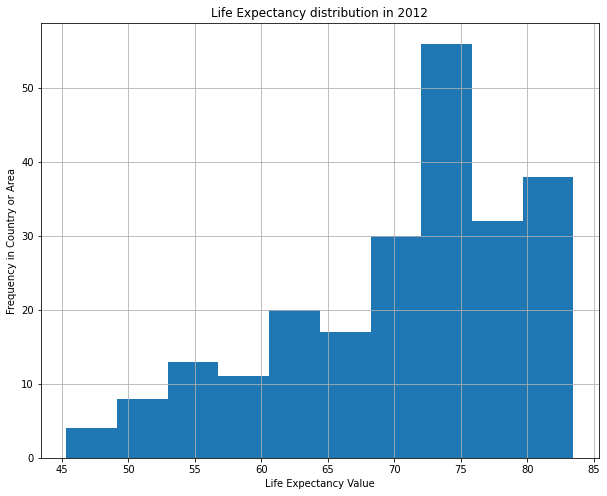

In [ ]:
datahist = data.hist(column='Value')
plt.title('Life Expectancy distribution in 2012')
plt.ylabel('Frequency in Country or Area')
plt.xlabel('Life Expectancy Value')

In [ ]:
plt.savefig('datahist')

<Figure size 720x576 with 0 Axes>

Let's try to improve the look of this. First of all, with

## ggplot

`ggplot` is a library originally developed for the **R** programming language, and subsequently ported into Python. It has a slightly nicer default look. It's fairly simple to invoke:

In [ ]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'World Life Expectancy Distribution in 2012')

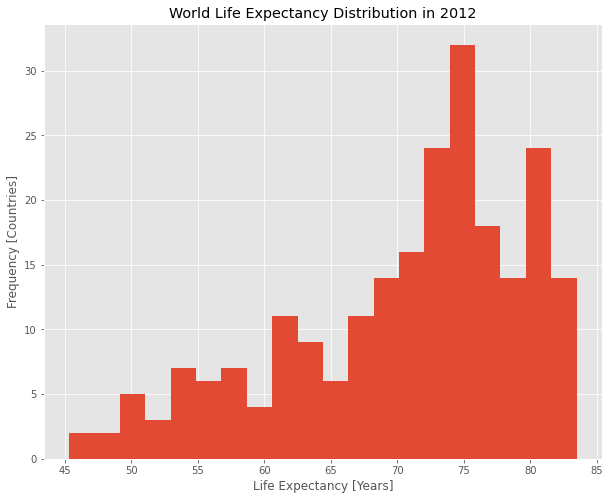

In [ ]:
summary = data.hist(bins = 20)
plt.xlabel('Life Expectancy [Years]')
plt.ylabel('Frequency [Countries]')
plt.title('World Life Expectancy Distribution in 2012')

Let's now start to work with data that runs over a number of years

In [ ]:
data_path = "./data/wk4/UN_Life_all.csv"
life = pd.read_csv(data_path)
life.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2012,60.509122,NaN
1,Afghanistan,2011,60.065366,NaN
2,Afghanistan,2010,59.600098,NaN
3,Afghanistan,2009,59.112341,NaN
4,Afghanistan,2008,58.607098,NaN


In [ ]:
life.drop(columns ='Value Footnotes', inplace=True)
life.head()

,Country or Area,Year,Value
0,Afghanistan,2012,60.509122
1,Afghanistan,2011,60.065366
2,Afghanistan,2010,59.600098
3,Afghanistan,2009,59.112341
4,Afghanistan,2008,58.607098


Note that we deliberately *don't* use one of the columns as the index, because there are multiple years of data for multiple countries. Let's carry out a *sort* operation on the data - to put in order of country, then year:

In [ ]:
life.sort_values(by=['Country or Area','Year'], inplace=True)
life.head()

,Country or Area,Year,Value
52,Afghanistan,1960,31.580049
51,Afghanistan,1961,32.095976
50,Afghanistan,1962,32.611878
49,Afghanistan,1963,33.127317
48,Afghanistan,1964,33.641244


## Selecting specific rows and columns

Let's plot this data out...

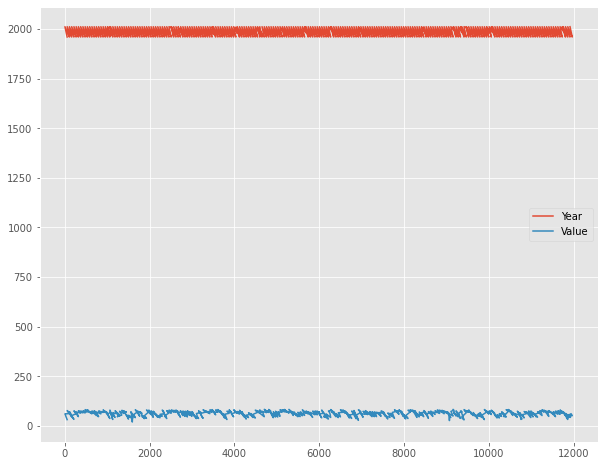

In [ ]:
life.plot()

This is not super-useful - "year" is much higher than other values (no-one lives to 2,000 years old) and it's being plotted on the same axes, obliterating the variations you would otherwise see. To create a scatter graph, we have to specify our x and y columns and tell the graph to create a scatterplot:

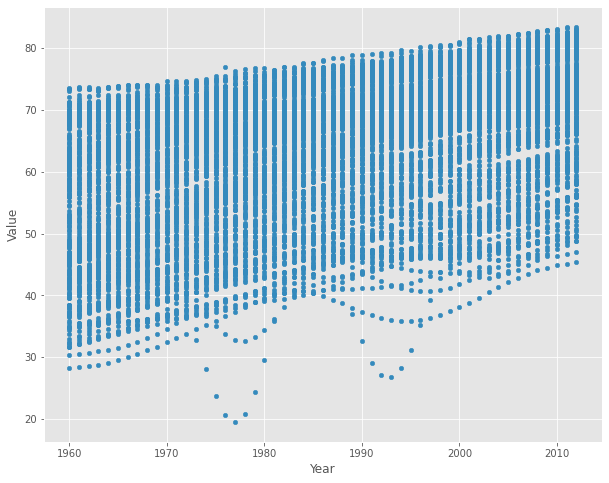

In [ ]:
life.plot(x='Year', y='Value',  kind='scatter')

This is a bit of a mess - the way the data is structured means that it's hard to colour each trace. It's not impossible, but in any case - that's a lot of data. Let's instead focus on the story of one or two countries.

Let's use a selection which just picks out data for Afghanistan:

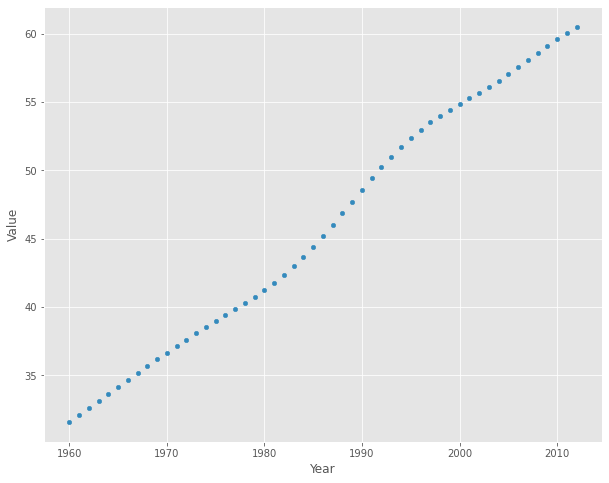

In [ ]:
afghan = life.loc[life['Country or Area']=='Afghanistan']
afghan.plot(x='Year', y= 'Value', kind='scatter')

This shows a somewhat linear increase over the last 50 years, with a couple of kinks. But how does this compare with its neighbours?

## Plotting multiple countries
Let's look at plotting multiple graphs on the same axis. First we create an axis object, and plot the data from Afghanistan on it:

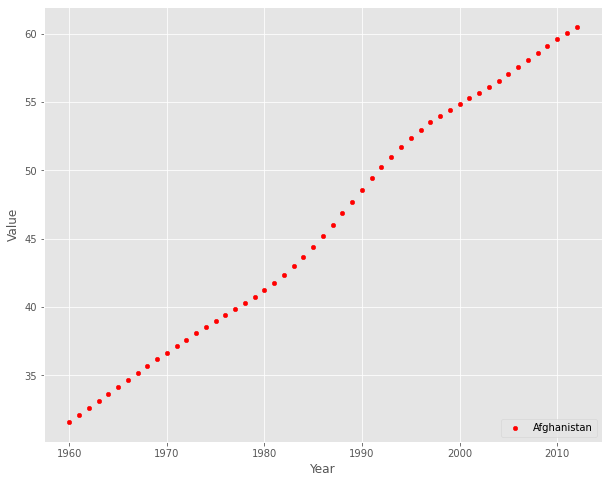

In [ ]:
ax = life.loc[life['Country or Area']=='Afghanistan'].plot(x='Year', y= 'Value', kind='scatter', c = 'red', label = 'Afghanistan')
ax.legend(loc='lower right')

Now, by passing "ax" as an optional argument, we can also draw data for Pakistan *on the same axes*:

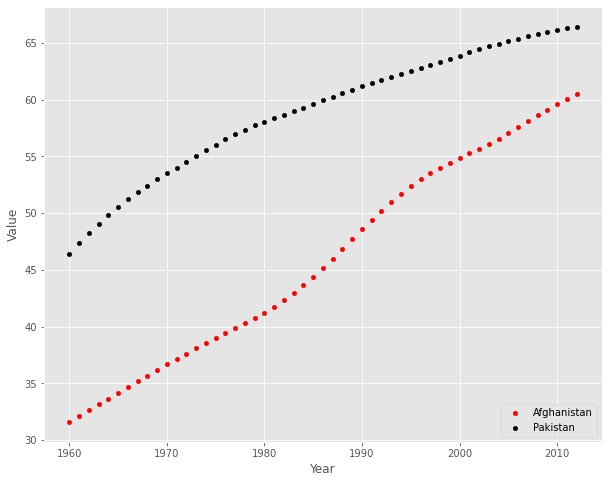

In [ ]:
ax = life.loc[life['Country or Area']=='Afghanistan'].plot(x='Year', y= 'Value', kind='scatter', c = 'red', label = 'Afghanistan')
life.loc[life['Country or Area']=='Pakistan'].plot(x='Year', y= 'Value', kind='scatter', c = 'black', ax=ax, label = 'Pakistan')
ax.legend(loc='lower right')

From this we can see a large (>15 year) disparity between the two countries at the beginning of the reporting period, with a bit of a dip to the upward trend for Afghanistan in the 1980s, and again in the early 2000s, corresponding to the ooccupations by the USSR and the USA/UK respectively - the impact of these conflicts is apparent in the data. By the most recent data, the gap has narrowed to ~5 years. 

Let's look at two other countries.

## Exercise

Create a scatter graph to contrast and comment on the change of the life expectancies for Iran and Iraq in the 1970-2010 period. 

*Hint: you may need to refer to the original data to see how these countries are labelled.*

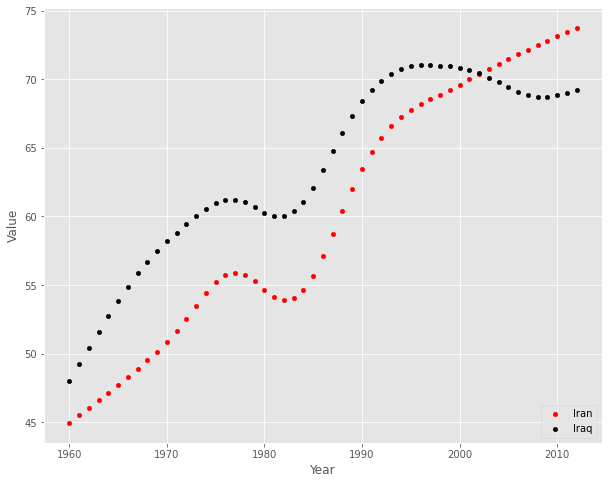

In [ ]:
ax = life.loc[life['Country or Area']=='Iran, Islamic Rep.'].plot(x='Year', y= 'Value', kind='scatter', c = 'red', label = 'Iran')
life.loc[life['Country or Area']=='Iraq'].plot(x='Year', y= 'Value', kind='scatter', c = 'black', ax=ax, label = 'Iraq')
ax.legend(loc='lower right')

**Stretch goal:** Show this data on a line plot, and compare it to the life expectancy in a Nordic country over the same period, using colour to distinguish.

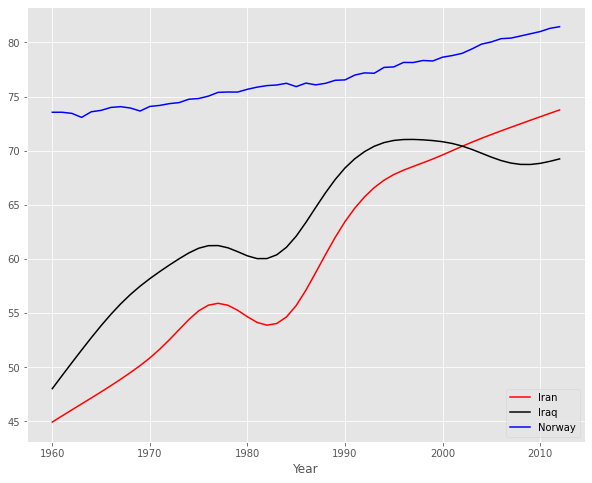

In [ ]:
ax = life.loc[life['Country or Area']=='Iran, Islamic Rep.'].plot(x='Year', y= 'Value', kind='line', c = 'red', label = 'Iran')
life.loc[life['Country or Area']=='Iraq'].plot(x='Year', y= 'Value', kind='line', c = 'black', ax=ax, label = 'Iraq')
life.loc[life['Country or Area']=='Norway'].plot(x='Year', y='Value', kind='line', c = 'blue', ax=ax, label = 'Norway' )
ax.legend(loc='lower right')

## Bokeh

![](http://orig13.deviantart.net/4518/f/2009/311/5/8/5816cf598bb8b306dafe75a9c1ab59e1.jpg)

Bokeh is a Python library which creates html charts for easy online sharing. Now, this might be a bit harder to work with in the context of a cms like Wordpress, but it's worth learning, as it also lets you export images from the interactives...

Let's  import this library via our package manager:

In [ ]:
!pip install bokeh
!pip install bkcharts

In [ ]:
from bokeh.plotting import figure, output_file, show, output_notebook

Let's plot all the data...

In [ ]:
data_path = "./data/wk4/Life_Expectancy_1.html"
output_file(data_path, title="Number of references per million words by year")
#output_notebook()
p = figure(title= "Life expectancy", x_axis_label='Year', y_axis_label='Life expectancy [Years]')
p.scatter(x=life['Year'], y = life['Value'])
show(p)

Go have a look in your Data Folder.  You'll now have a file called Life_Expectancy_1.html in there. Download this to open and view it.

Bit of a mess. Let's instead look at two countries - Vietnam, and France, its previous historical colonial occupier.

In [ ]:
data_path = "./data/wk4/Life_Expectancy_2.html"

output_file(data_path, title="Life Expectancy")
#output_notebook()
p = figure(title= "Life expectancy", x_axis_label='Year', y_axis_label='Life expectancy [Years]')
p.line(x=life[life['Country or Area']=='France']['Year'], y = life[life['Country or Area']=='France']['Value'], legend_label='France')
p.line(x=life[life['Country or Area']=='Vietnam']['Year'], y = life[life['Country or Area']=='Vietnam']['Value'], legend_label = 'Vietnam')
show(p)

Go have a look in your Data Folder again.  You'll now have a file called Life_Expectancy_2.html in there.

## Exercise:
Using the resulting html page, create a .png file which covers the period 1960-1985.

**Stretch goals:**

- Modify the p.legend.location variable so the legend shows in the top left of the graph.
- Set line_color (an optional argument) to black for France and blue for Vietnam


In [ ]:
from bokeh.models import Range1d
p.x_range = Range1d(start=1960, end=1985)

## Seaborn

![](https://media.giphy.com/media/yoJC2A59OCZHs1LXvW/giphy.gif)

Seaborn is a library used for creating a range of visualisations that are difficult to create in other ways, including cluster maps, kdes, violin plots, and scatter matrices.



In [ ]:
import seaborn

First off, importing this will change the default look of graphs:

In [ ]:
life['Value'].hist()

But let's work with some functions specific to Seaborn. For example, we can do a boxplot for the whole dataset (not very exciting, but bear with me):

In [ ]:
seaborn.boxplot(data=life['Value'])

And we can create a violin plot of the data - which is effectively a (smoothed) histogram of the data. Compare it to the above histogram.

In [ ]:
seaborn.violinplot(data=life['Value'], inner='quartile')

More generally, we can not only show a distribution, we can also show multiple distributions (e.g. at different timepoints) and shade and split the distribution by a binary variable (e.g. sex). Here is a built-in example from the seaborn library which shows a much more sophisticated violin plot.

In [ ]:
#tips = seaborn.load_dataset("tips")
tips = pd.read_csv('./data/wk4/tips.csv', error_bad_lines=False)


In [ ]:
seaborn.set(style="whitegrid", palette="pastel", color_codes=True)
seaborn.set_color_codes("dark")

# Load the example tips dataset

# Draw a nested violinplot and split the violins for easier comparison
seaborn.violinplot(x="day", y="tip", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
seaborn.despine(left=True)

This example is a bit unusual because it's not a histogram - the "y" axis is the tip for a given day ("x"). Then the data is split by gender. In this graph, we are showing a very rich dataset - the distribution of tips,  gender and time. Thus we're showing a complex dataset in an accessible way. **What does this graph tell us?**

In [ ]:
#basically tells us the frequency of receiving x amount of tips for males and females
# depending on the day of the week i.e. a distribution

## I hear the sound of violins
Let's now apply this visualisation technique to our life expectancy data. I'm interested in the distribution of life expectancy year on year - not the life expectancies, now, of individual countries, but each year, what is the histogram of life expectancies across the world. Rather than using *every* reporting year, I'm going to look at every ten years.

**Extension: Modulo arithmatic**
The modulo (%) symbol divides two integers and finds the remainder. You may remember from primary school (though possibly not) that in dividing integers, we had an "answer" and a "remainder" rather than a pure decimal. So

- 1/2 = 0 r 1
- 11/7 = 1 r 4
 - 23/10 = 2 r 3

modulo arithmatic just takes the remainder, so

- 1%2 = 1
- 11%7 = 4
- 23%10 = 3 

and so on. I've used that below to pick out specific dates, only allowing years where year%10==0; so this will give me 1960, 1970, 1980, 1990, 2000 and 2010. **How would I have phrased this if I'd wanted 1962, 1972, etc? What if I'd wanted 1960, 1965, 1970, 1975, etc?**


In [ ]:
#for 1962,1972 etc year%10==2
#for 1960, 1965, 1970 etc year%5==0

In [ ]:
seaborn.violinplot(data=life[life['Year']%10==0], x='Year', y= 'Value')
plt.ylabel('Life Expectancy [Years]')

## Question
What does this visualisation tell us about changes in the world over half a century?

In [ ]:
#life expectancy not only has increased overall, there is a more unequal distribution, showing that 
#proportionally more people have a higher life expectancy 
#we can also see this shift has been gradual too 

## Split and run
I want to run the data with a split violinplot (as the tipping example above has created). What I will do is to show the same data, but instead of having several timeperiods, I will compare two years (1960 and 2010) on one split plot. This means that the year is no longer the x axis (it's the split variable), so I will make up a dummy variable in order to plot the data. (This isn't something we'd normally do, it's just to get this simple example working)

In [ ]:
life['Dummy'] = [1]*len(life.index)
life.head()

The code we produce to create the violinplot is more complex than our last example. Take a look at it and the output:

In [ ]:
seaborn.violinplot(data=life[life['Year']%50==10], x = 'Dummy', y= 'Value', hue = 'Year', split=True, inner='quartile')
plt.ylabel('Life Expectancy [Years]')
plt.xlabel('Frequency Distribution')

In [ ]:
seaborn.violinplot(data=life[life['Year']%50==10], x = 'Dummy', y= 'Value', hue = 'Year', inner='quartile')
plt.ylabel('Life Expectancy [Years]')
plt.xlabel('Frequency Distribution')

In [ ]:
seaborn.violinplot(data=life[life['Year']%50==10], x = 'Dummy', y= 'Value', hue = 'Year', split=True)
plt.ylabel('Life Expectancy [Years]')
plt.xlabel('Frequency Distribution')

## Extension: How did I produce this plot?
Consider:
- What is the data source?
- Why does 'Year' need to be a binary variable, and how have I achieved that?
- Where have a specified the variable that the split occurs on? Make a copy of the cell and see what happens when you remove this condition
- What does the Split=True argument mean? What happens if you remove it?
- What does the inner=quartile argument mean? What happens if you remove or change it? What alternatives are there, and what do they look like?

In [ ]:
#data source is 'life' file we used before
#as the year is now the split variable, the xaxis can no longer be the years, that is why you added a dummy variable which
#takes the value 0 or 1, in this case 1
#split removed on the graph above: split function allows to split the violin into two for easier comparison, if I remove it,
#it creates two violin plots, one for each year 
#inner=quartile removed it in the last graph above: the lines to indicate the first and third quartiles and the mean are gone, 
#to add it enables more descriptive statistics 

## Exercise

Using the UN cities data (from the same source as last week) create violin plots for  2010-2014 inclusive, showing the distribution of city populations by year, split by sex. Think carefully about each step required to reach the final goal. What problems are there with showing the data in this way?

In [ ]:
data_path = "https://s3.eu-west-2.amazonaws.com/qm2/wk4/cities_violin.png"

from IPython.display import Image
Image(data_path)

In [ ]:
#to get there 
cities = pd.read_csv('/content/data/wk4/UN_Cities_all.csv')
cities.head()

In [ ]:
#there can only be exactly 2 values for 'sex' whereas the dataset comprises 'male' 'female and 'both sexes' so the data needs to be selected
cities = cities[cities.Sex != 'Both Sexes']
# only from 2010 to 2014 
cities = cities[cities.Year > 2009]

In [ ]:
cities.head()

In [ ]:
seaborn.violinplot(x="Year", y="Value", hue="Sex", data=cities, split=True)
plt.xlabel('Year')
plt.ylabel('Population[people]')

In [ ]:
#it isn't exactly the same one, as female and male position in the plots are reversed 
#but it does not look too bad overall 
#the complications were to clean the data to select the wanted years and only female and male, omitting 'both sexes'
#the problem is that there seems like there is one or more outliers with more inhabitants than the other cities
#therefore the y axis is not really tractable
#if we wanted to really see the distribution of the population we would have to take out the outliers or really modify the scale of the violin plots 

## Extension
How are these graphing techniques useful and relevant to your datasets and group projects?

In [ ]:
#these distributions are relevant to our group projects in terms of descriptive statistics, normalizing data etc
#they are really useful to make comparisons, especially when the split function is used and can be easily
#understood by the reader, with the appropriate legends and title of course 